<a href="https://colab.research.google.com/github/anuragphalke09/Python_Projects/blob/main/Customer_Churn_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Excel file
xls = pd.ExcelFile("Customer_Churn_Data_Large.xlsx")

In [3]:
# Load each sheet
df_demo = xls.parse("Customer_Demographics")
df_trans = xls.parse("Transaction_History")
df_service = xls.parse("Customer_Service")
df_online = xls.parse("Online_Activity")
df_churn = xls.parse("Churn_Status")

In [4]:
# Aggregate Transaction History
agg_trans = df_trans.groupby("CustomerID").agg({
    "AmountSpent": ["sum", "mean", "count"],
    "ProductCategory": pd.Series.nunique
})
agg_trans.columns = ["TotalSpent", "AvgSpent", "NumTransactions", "UniqueCategories"]
agg_trans = agg_trans.reset_index()

In [5]:
# Merge all datasets
df_merged = df_demo.merge(agg_trans, on="CustomerID", how="left")
df_merged = df_merged.merge(df_service.drop(columns=["InteractionID", "InteractionDate"]), on="CustomerID", how="left")
df_merged = df_merged.merge(df_online, on="CustomerID", how="left")
df_merged = df_merged.merge(df_churn, on="CustomerID", how="left")

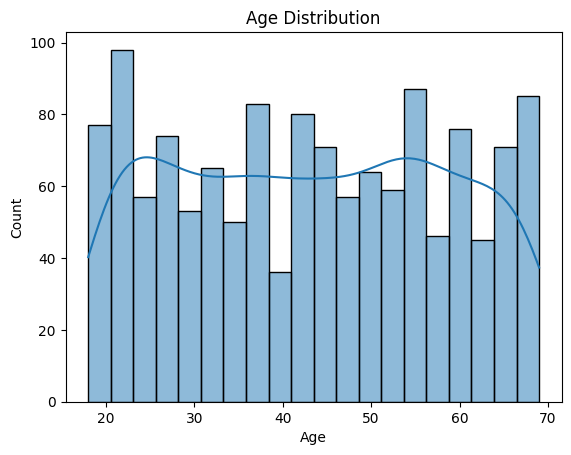

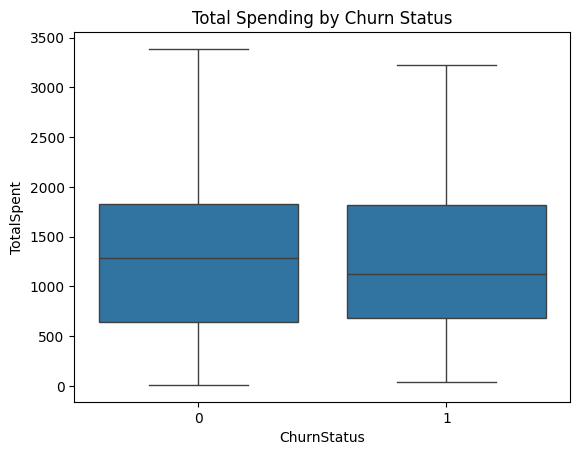

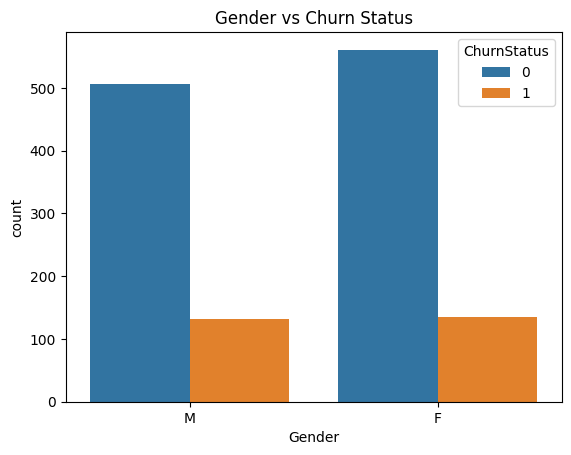

In [6]:
# EDA: Visuals
sns.histplot(df_merged["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x="ChurnStatus", y="TotalSpent", data=df_merged)
plt.title("Total Spending by Churn Status")
plt.show()

sns.countplot(x="Gender", hue="ChurnStatus", data=df_merged)
plt.title("Gender vs Churn Status")
plt.show()

In [7]:
# Data Cleaning
df_cleaned = df_merged.copy()
df_cleaned['TotalSpent'].fillna(0, inplace=True)
df_cleaned['AvgSpent'].fillna(0, inplace=True)
df_cleaned['NumTransactions'].fillna(0, inplace=True)
df_cleaned['UniqueCategories'].fillna(0, inplace=True)
df_cleaned['InteractionType'].fillna('None', inplace=True)
df_cleaned['ResolutionStatus'].fillna('None', inplace=True)
df_cleaned['LoginFrequency'].fillna(df_cleaned['LoginFrequency'].median(), inplace=True)
#df_cleaned['ServiceUsage'].fillna(df_cleaned['ServiceUsage'].median(), inplace=True)

/tmp/ipython-input-7-1631552432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['TotalSpent'].fillna(0, inplace=True)
/tmp/ipython-input-7-1631552432.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [8]:
# Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=["Gender", "MaritalStatus", "InteractionType", "ResolutionStatus"], drop_first=True)
df_encoded['ChurnStatus'] = df_encoded['ChurnStatus'].map({'Yes': 1, 'No': 0})

In [9]:
# Scaling
num_cols = ['Age', 'TotalSpent', 'AvgSpent', 'NumTransactions', 'UniqueCategories', 'LoginFrequency'] # Removed 'ServiceUsage'

# Map 'IncomeLevel' to numerical values
# Assuming 'Low', 'Medium', 'High' represent increasing income levels
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_encoded['IncomeLevel'] = df_encoded['IncomeLevel'].map(income_mapping)

# Add 'IncomeLevel' back to the list of numerical columns after mapping
num_cols.append('IncomeLevel')

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [10]:
# Final cleaned dataset is df_encoded
df_encoded.to_csv("cleaned_churn_data.csv", index=False)
print("✅ Data cleaned and saved as cleaned_churn_data.csv")

✅ Data cleaned and saved as cleaned_churn_data.csv


In [61]:
import pandas as pd

# Load Excel
file_path = "Customer_Churn_Data_Large.xlsx"
demographics = pd.read_excel(file_path, sheet_name="Customer_Demographics")
transactions = pd.read_excel(file_path, sheet_name="Transaction_History")
service = pd.read_excel(file_path, sheet_name="Customer_Service")
online = pd.read_excel(file_path, sheet_name="Online_Activity")
churn = pd.read_excel(file_path, sheet_name="Churn_Status")

# Aggregate Transactions
trans_agg = (
    transactions.groupby("CustomerID")
    .agg(
        TotalSpent=('AmountSpent', 'sum'),
        AvgSpent=('AmountSpent', 'mean'),
        NumTransactions=('TransactionID', 'count'),
        UniqueCategories=('ProductCategory', 'nunique')
    )
    .reset_index()
)

# Aggregate Customer Service Interactions
service_agg = (
    service.groupby("CustomerID")
    .agg({
        "InteractionType": "last",       # or mode/most frequent
        "ResolutionStatus": "last"
    })
    .reset_index()
)

# Merge all datasets
df_merged = demographics.merge(trans_agg, on="CustomerID", how="left") \
                        .merge(service_agg, on="CustomerID", how="left") \
                        .merge(online, on="CustomerID", how="left") \
                        .merge(churn, on="CustomerID", how="left")

# Display result
print(df_merged.head())


   CustomerID  Age Gender MaritalStatus IncomeLevel  TotalSpent   AvgSpent  \
0           1   62      M        Single         Low      416.50  416.50000   
1           2   65      M       Married         Low     1547.42  221.06000   
2           3   18      M        Single         Low     1702.98  283.83000   
3           4   21      M       Widowed         Low      917.29  183.45800   
4           5   21      M      Divorced      Medium     2001.49  250.18625   

   NumTransactions  UniqueCategories InteractionType ResolutionStatus  \
0                1                 1         Inquiry         Resolved   
1                7                 4         Inquiry         Resolved   
2                6                 4         Inquiry         Resolved   
3                5                 4         Inquiry       Unresolved   
4                8                 3             NaN              NaN   

  LastLoginDate  LoginFrequency ServiceUsage  ChurnStatus  
0    2023-10-21              34 

In [62]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [63]:
# Assume df_merged is your final DataFrame with churn and features
df = df_merged.dropna(subset=["ChurnStatus"])

In [64]:
#Define features and target
X = df.drop(columns=["CustomerID", "ChurnStatus", "LastLoginDate"])
y = df["ChurnStatus"]

In [65]:
#Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [66]:
#Preprocessing transformers
numeric_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [67]:
#Column transformer
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [68]:
#Complete pipeline
clf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [69]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [70]:
#Hyperparameter tuning using GridSearchCV
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5]
}

cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'TotalSpent',
                                                                          'AvgSpent',
                                                                          'NumTransactions',
                                                                          'UniqueCategories',
                                                                          'LoginFrequency']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'MaritalStatus',
                                                                          'IncomeLevel',
                                                                          'InteractionType',
                                                                          'ResolutionStatus',
                                                                          'ServiceUsage'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1')

In [72]:
#Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       159
           1       0.25      0.02      0.04        41

    accuracy                           0.79       200
   macro avg       0.52      0.50      0.46       200
weighted avg       0.68      0.79      0.71       200

Confusion Matrix:
 [[156   3]
 [ 40   1]]
ROC-AUC Score: 0.48435342843994483
